## Regression Task
### Libraries and csv data imports

In [1]:
#importing pandas and numpy
import pandas as pd
import numpy as np

#importing csv file cars.csv
df = pd.read_csv('cars.csv', header=None)  #import dataset as df

#printing top 5 rows of data
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,22,5,4,64.2,65.7,17.1,2.0,10,55,19,40600
1,22,5,4,64.2,65.7,17.1,2.0,10,55,19,45500
2,22,5,4,64.2,65.7,17.1,2.0,10,45,20,43600
3,22,5,4,64.2,65.7,17.1,2.0,10,55,19,37400
4,21,5,4,64.2,65.7,17.1,2.0,10,55,19,42600


### Data Preprocessing

In [2]:
#concatinating bias terms
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)   
df.head()

,00,0,1,2,3,4,5,6,7,8,9,10
0,1,22,5,4,64.2,65.7,17.1,2.0,10,55,19,40600
1,1,22,5,4,64.2,65.7,17.1,2.0,10,55,19,45500
2,1,22,5,4,64.2,65.7,17.1,2.0,10,45,20,43600
3,1,22,5,4,64.2,65.7,17.1,2.0,10,55,19,37400
4,1,21,5,4,64.2,65.7,17.1,2.0,10,55,19,42600


### Splitting explanatory and output variables

In [3]:
x = df.drop(columns=10)  #splitting columns and taking in explanatory variables as x
x.head() #Showing top 5 rows of x 

,00,0,1,2,3,4,5,6,7,8,9
0,1,22,5,4,64.2,65.7,17.1,2.0,10,55,19
1,1,22,5,4,64.2,65.7,17.1,2.0,10,55,19
2,1,22,5,4,64.2,65.7,17.1,2.0,10,45,20
3,1,22,5,4,64.2,65.7,17.1,2.0,10,55,19
4,1,21,5,4,64.2,65.7,17.1,2.0,10,55,19


In [4]:
y = df.iloc[:, 11]  #splitting column and taking in the output variable as y
y.head() #Showing top 5 rows of y 

0    40600
1    45500
2    43600
3    37400
4    42600
Name: 10, dtype: int64

#### Normalization

In [5]:
#normalization to get each column into same scale
for i in range(1, len(x.columns)):  
    x[i-1] = x[i-1]/np.max(x[i-1]) 
x.head() #Displays data after normalization

,00,0,1,2,3,4,5,6,7,8,9
0,1,0.846154,0.714286,1.0,0.968326,0.971893,0.876923,0.571429,1.0,0.916667,0.95
1,1,0.846154,0.714286,1.0,0.968326,0.971893,0.876923,0.571429,1.0,0.916667,0.95
2,1,0.846154,0.714286,1.0,0.968326,0.971893,0.876923,0.571429,1.0,0.750000,1.00
3,1,0.846154,0.714286,1.0,0.968326,0.971893,0.876923,0.571429,1.0,0.916667,0.95
4,1,0.807692,0.714286,1.0,0.968326,0.971893,0.876923,0.571429,1.0,0.916667,0.95


In [7]:
theta = np.array([0]*len(x.columns))  #theta initiazed as 0
theta

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [8]:
m = len(df)  #assign number of training data to m
m #display m

100

In [9]:
def hypothesis(theta, x):  #defining hypothesis function
    return theta*x

In [10]:
def cost(x, y, theta):  #defining cost function
    y1 = hypothesis(theta, x)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*100)

In [11]:
#defining gradient descent taking x,y,theta,alpha (learning rate) and iteration
def gradientDescent(x, y, theta, alpha, i):
    J = []  #cost function 
    k = 0
    while k < i:        
        y1 = hypothesis(theta, x)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(x.columns)):
            theta[c] = theta[c] - alpha*(sum((y1-y)*x.iloc[:,c])/len(x))
        j = cost(x, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

In [12]:
#getting the final cost from gradient descent function with theta optimization
J, j, theta = gradientDescent(x, y, theta, 0.2, 10000)

In [13]:
#output prediction with the help of theta optimization
y_cap = hypothesis(theta, x)
y_cap = np.sum(y_cap, axis=1)

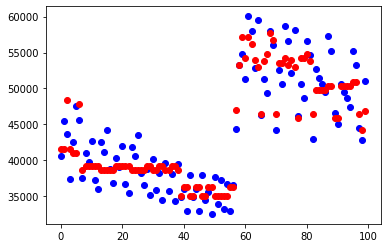

In [14]:
#ploting the original output value and predicted output value
%matplotlib inline
import matplotlib.pyplot as plt #importing matplotlib to plot into scatterplot
plt.figure() 
plt.scatter(x=list(range(0, 100)),y= y, color='blue')         
plt.scatter(x=list(range(0, 100)), y=y_cap, color='red')
plt.show()

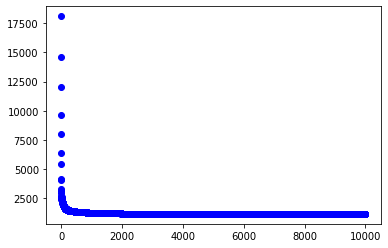

In [15]:
#ploting the cost of each iteration
plt.figure()
plt.scatter(x=list(range(0, 10000)),color = "blue", y=J)
plt.show()

In [16]:
#importing r2_score from sklearn to calculate accuracy of the model
from sklearn.metrics import r2_score

#printing r2 score
print(r2_score(y,y_cap))

0.862645934345962


In [17]:
#implementing r2_score to calculate accuracy
Accuracy = r2_score(y,y_cap)

In [18]:
#formatting accuracy score and printing it
# print("The Accuracy of the model is: {:.2f}".format(Accuracy))
print("The accuracy of the model is:", int(Accuracy*100), '%')

The accuracy of the model is: 86 %
